## Template v1 for producing consistent global maps of a scalar field for SENEMO paper

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import xarray as xr

import cartopy as ctp
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import crs as ccrs
from matplotlib import colors as c

### load some sample data 

In [17]:
fname="/gws/nopw/j04/class_vol2/senemo/RUNS2024r01/GS1p2_full/output/SENEMO_1m_19780101_19781231_grid_T_197808-197808.nc"
dsScalarField=xr.open_dataset(fname,engine='netcdf4')
scalar2Ddata=dsScalarField.zos

#Ensure that the data doesn't have a spare 3rd dimension
scalar2Ddata=scalar2Ddata.squeeze()

#Define the lon and lats to match the scalar field (same shape at scalar2Ddata) - for NEMO output, usually it is read in by xarray with dimensions nav_lat and nav_lon
lon2D=scalar2Ddata.nav_lon
lat2D=scalar2Ddata.nav_lat

### make the plot

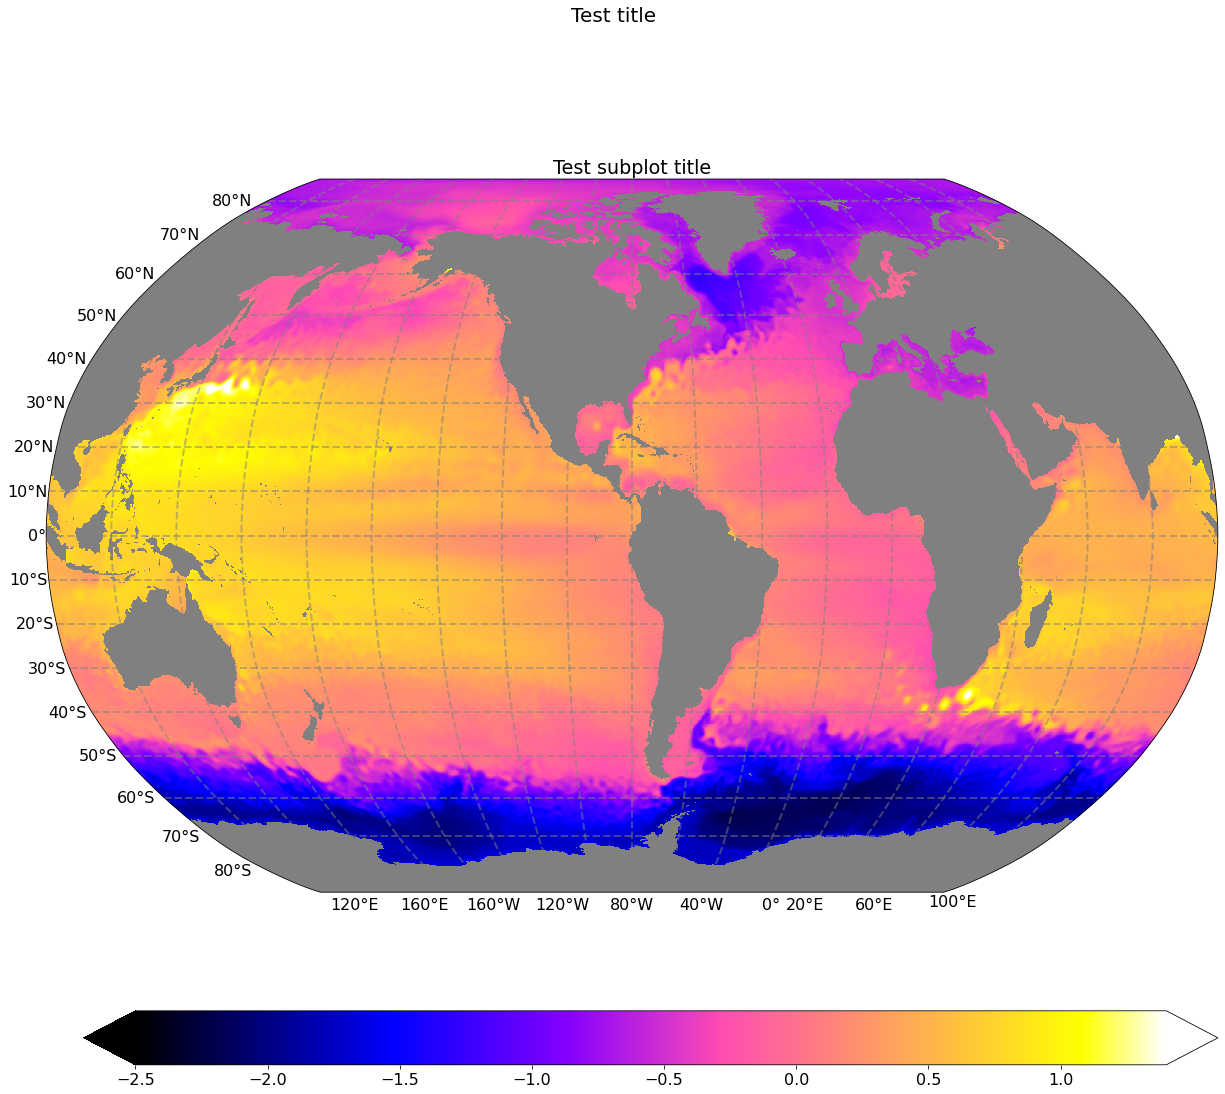

In [26]:
# Adjustable parameters vvvvvvvvvvvvv

figtitle='Test title' #title for the figure
subplottitle1='Test subplot title' #subplot title for subplot 1

# Define the min and max values of the range of data plotted in subplot 1
# Values outside this range will be included in the saturated regions of the colorbar
sp1_vmin=-2.5
sp1_vmax=1.4

cmapselected=cmapsequential    #choose one from the 4 options: cmapsequential,cmapsequentialflipped,cmapdiverging_bwr,cmapdiverging_rwb (see below)
# Adjustable parameters ^^^^^^^^^^^^^




# Fixed parameters ------------------
#set default font size
mpl.rcParams.update({'font.size': 16})

#set figure title font size
tfs=20

clonfixed=-80 #fixed central longitude for our preferred version of the Robinson projection
fixedprojection=ccrs.Robinson(central_longitude=clonfixed)

# Preferred colormaps
cmapsequential='gnuplot2' #black-blue-magenta-orange-yellow-white
cmapsequentialflipped='gnuplot2_r' #same, but reversed
cmapdiverging_bwr='seismic' # blue-white-red : please ensure that white is centred on a feature of the data, e.g. its mean or zero: use sp1_vmin, sp1_vmax (above)
cmapdiverging_rwb='seismic_r' # red-white-blue: please ensure that white is centred on a feature of the data, e.g. its mean or zero

#-------------------------

# Make the plot

cMap = c.ListedColormap(['black',])

#Bad data (NaN) is set to grey -> land should be NaN and grey
cMap.set_bad('grey',1.)

def main():
    fig = plt.figure(figsize=(21, 15))
    
    fig.suptitle(figtitle, fontsize=tfs)
    
    plt.subplots_adjust(wspace=0.1,hspace=0.1)

    # This example has a single subplot, but multiple subplots could be used (although more of this script might need adjusting)
    # e.g. ax2 = fig.add_subplot(2, 1, 1, projection=fixedprojection); ax3 = fig.add_subplot(2, 1, 2, projection=fixedprojection); ...
    
    ax = fig.add_subplot(1, 1, 1, projection=fixedprojection)
    
    ax.set_title(subplottitle1)
    ax.set_global()
    
    ax.set_aspect(1.2)

    #sets the land colour as grey (must be missing data)
    ax.set_facecolor("grey") 
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=np.linspace(-160,200,19), ylocs=np.linspace(-80,80,17),    #sets the gridlines of lats and lons (do not change for global map)
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False

    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Plot scalar field, here using pcolormesh.  Could substitute another plotting method, but please attempt to retain 
    # this choice of colormap

    
    scalar_subplot = ax.pcolormesh(lon2D,lat2D, scalar2Ddata  , transform=ccrs.PlateCarree(), cmap=cmapselected, vmin=sp1_vmin, vmax=sp1_vmax)


    

    fig.subplots_adjust(bottom=0.1)
    cbar_ax = fig.add_axes([0.15, 0, 0.75, 0.05]) #position and shape of the colorbar on the figure
    fig.colorbar(scalar_subplot, cax=cbar_ax, orientation='horizontal', extend='both')  #plot the colorbar

    #uncomment the line below to save a .PNG version of the figure, with GMD's minimum requirement of 300 dpi
    #plt.savefig("./testplot.png", format="png", dpi=400, bbox_inches="tight",facecolor="white", edgecolor='none')
    
    plt.show()


if __name__ == '__main__':
    main()